# Decision Trees with Sklearn

### Introduction

In previous lessons, we learned about the hypothesis function, as well as how to train a decision tree.  Now, as you may have guessed, we generally do not find train our machine learning model's by hand, but instead use a library to do so.

In this lesson, we'll see how.

### Machine Learning 

Let's start with our training data.

Currently, our data is in a comma separated file (csv file).  A comma separated file is just a text file, where each entry is separated by commas.

```
?, Yes, Manhattan, < 55, 0
Yes Yes, Brooklyn, < 55, 0
```

Our csv file is located online here.  We can read in our csv file by using our pandas library. 

In [14]:
import pandas as pd
df = pd.read_csv('./customer_data.csv', index_col = 0)
df

,attended_college,under_thirty,borough,income,customer
0,?,Yes,Manhattan,< 55,0
1,Yes,Yes,Brooklyn,< 55,0
2,?,No,Brooklyn,< 55,1
3,No,No,Queens,> 100,1
4,?,No,Queens,55 - 100,1
5,Yes,No,Manhattan,> 100,0
6,Yes,No,Queens,> 100,0
7,Yes,Yes,Brooklyn,55 - 100,0


Ok, we'll dig into the pandas library later.  But essentially, we are just using the `read_csv` method, and then providing the location of our data, which here is a url.

Our goal is to have a decision tree model use the features and the related targets to learn what's predictive of someone  becoming a customer.

## Format our Data

Now it's time to feed our data into a machine learning algorithm, and see if it can learn what makes someone a customer.

In [15]:
df

,attended_college,under_thirty,borough,income,customer
0,?,Yes,Manhattan,< 55,0
1,Yes,Yes,Brooklyn,< 55,0
2,?,No,Brooklyn,< 55,1
3,No,No,Queens,> 100,1
4,?,No,Queens,55 - 100,1
5,Yes,No,Manhattan,> 100,0
6,Yes,No,Queens,> 100,0
7,Yes,Yes,Brooklyn,55 - 100,0


So once again, above is our customer data, and now let's feed it into a machine learning model.  Unfortunately, the above data is not formatted correctly.  For our machine learning model to understand our data, we need to turn everything into a number.  We can do this by assigning each value in a column a number.  We'll discuss how to do this later - so let's just skip to the end result for now.

In [7]:
import pandas as pd
X = pd.read_csv('./customer_feature_data.csv', index_col = 0)
X

,attended_college,under_thirty,borough,income
0,0,1,1,1
1,2,1,0,1
2,0,0,0,1
3,1,0,2,2
4,0,0,2,0
5,2,0,1,2
6,2,0,2,2
7,2,1,0,0


So we can see that every time there is a `?` in the attended college column, it's represented with a 0.  And all of the Yes values are represented as `1`.  The standard notation is to set our feature matrix to the variable `X` (as in `f(x)`, for those of you math oriented).  The above is just our feature data, notice that the `customer` column is not included.

Now let's load up our target data and assign our target to the variable `y`.

In [8]:
y =  pd.read_csv('./customer_target_data.csv', index_col = 0, names = ['y'])
y

,y
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0


### Use the Machine Learning Algorithm

Ok, now that all of our data is represented as a number, it's time to feed our data into a machine learning model.

Various machine learning models are pre-built for us with a library like SciKit Learn (sklearn).  The library is already downloaded into our environment, so now we just need to tell Jupyter to use the `sklearn.tree` module's `DecisionTreeClasifier`.  

In [9]:
from sklearn.tree import DecisionTreeClassifier

Once we've loaded up our `DecisionTreeClassifier`, we'll create an instance of the model, and then train it on our data.

In [29]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Believe it or not, our training process is now complete.  We can see the hypothesis function that was created by using the `dtreeviz` library.

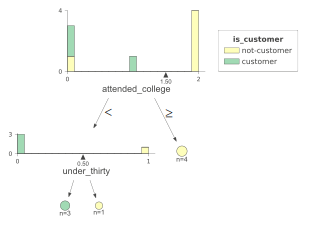

In [23]:
from dtreeviz.trees import dtreeviz
viz_1 = dtreeviz(model,
               X.to_numpy(),
               df['customer'],
               target_name='is_customer',
               feature_names=df.columns,
               class_names=['not-customer', 'customer']
              )
              
viz_1   

So above we can see that the hypothesis function that sklearn arrived at is quite similar to the one that we arrived at.  

> It is slightly different because sklearn only splits on one feature value at a time, and then recalculates the next best feature, whereas we split on both `attended_college` and `not_attended_college` immediately, and our remaining subsett was only for data that had `?` for college.

Now that our model is trained, we can pass through any observation with our trained features and it will make a prediction. 

In [24]:
X[:1]

,attended_college,under_thirty,borough,income
0,0,1,1,1


In [25]:
model.predict(X[:1])

array([0])

In [28]:
future_data = [[1, 0, 0, 0]]
model.predict(future_data)

array([1])

### Let's Summarize

We train our decision tree in sklearn by first ensuring that all of our data is numeric, and having our data separated into our feature data, and our targets.

In [32]:
X[:3]

,attended_college,under_thirty,borough,income
0,0,1,1,1
1,2,1,0,1
2,0,0,0,1


In [33]:
y[:3]

,y
0,0
1,0
2,1


Then we can train our model, by loading in the correct model from `sklearn` and initializing and then training our model.

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Now, our model is trained, and next we can use the model to predict the outcome of any observation.

In [35]:
future_data = [[1, 0, 0, 0]]
model.predict(future_data)

array([1])